In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the CSV file
df = pd.read_csv("Testing.csv")

In [3]:
df.shape

(308, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Printing top 5 rows
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      120             72             22       56  20.8   
1            1       71             62              0        0  21.8   
2            8       74             70             40       49  35.3   
3            5       88             78             30        0  27.6   
4           10      115             98              0        0  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.733   48        0  
1                     0.416   26        0  
2                     0.705   39        0  
3                     0.258   37        0  
4                     1.022   34        0

In [6]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
303           10      101             76             48      180  32.9   
304            2      122             70             27        0  36.8   
305            5      121             72             23      112  26.2   
306            1      126             60              0        0  30.1   
307            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
303                     0.171   63        0  
304                     0.340   27        0  
305                     0.245   30        0  
306                     0.349   47        1  
307                     0.315   23        0

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               308 non-null    int64  
 1   Glucose                   308 non-null    int64  
 2   BloodPressure             308 non-null    int64  
 3   SkinThickness             308 non-null    int64  
 4   Insulin                   308 non-null    int64  
 5   BMI                       308 non-null    float64
 6   DiabetesPedigreeFunction  308 non-null    float64
 7   Age                       308 non-null    int64  
 8   Outcome                   308 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.8 KB


In [9]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
303        False    False          False          False    False  False   
304        False    False          False          False    False  False   
305        False    False          False          False    False  False   
306        False    False          False          False    False  False   
307        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
303                     False  False    False  
304                     False  False    False  
305                     False  False    False  
306                     False  False    False  
307                     False  False    False  

[308 rows x 9 columns]

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.nunique()

Pregnancies                  14
Glucose                     116
BloodPressure                37
SkinThickness                44
Insulin                      99
BMI                         166
DiabetesPedigreeFunction    263
Age                          47
Outcome                       2
dtype: int64

In [12]:
#Describe the data
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   308.000000  308.000000     308.000000     308.000000  308.000000   
mean      3.863636  119.983766      69.503247      20.694805   77.724026   
std       3.381437   31.186260      19.555067      16.298250  106.528025   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   97.750000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   17.000000   
75%       6.000000  136.000000      80.000000      32.000000  127.750000   
max      13.000000  199.000000     114.000000      99.000000  600.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  308.000000                308.000000  308.000000  308.000000  
mean    31.865909                  0.445042   33.730519    0.301948  
std      7.427594                  0.297660   12.208374    0.459850  
min      0.000000                  0.085000   21.000000    0.000000  
25%     27.400000                  0.228250   24.000000    0.000000  
50%     32.000000                  0.348000   29.000000    0.000000  
75%     36.425000                  0.600000   42.000000    1.000000  
max     57.300000                  1.699000   70.000000    1.000000

In [13]:
# With transpose
df.describe().T

count        mean         std     min       25%  \
Pregnancies               308.0    3.863636    3.381437   0.000   1.00000   
Glucose                   308.0  119.983766   31.186260   0.000  97.75000   
BloodPressure             308.0   69.503247   19.555067   0.000  62.00000   
SkinThickness             308.0   20.694805   16.298250   0.000   0.00000   
Insulin                   308.0   77.724026  106.528025   0.000   0.00000   
BMI                       308.0   31.865909    7.427594   0.000  27.40000   
DiabetesPedigreeFunction  308.0    0.445042    0.297660   0.085   0.22825   
Age                       308.0   33.730519   12.208374  21.000  24.00000   
Outcome                   308.0    0.301948    0.459850   0.000   0.00000   

                              50%      75%      max  
Pregnancies                 3.000    6.000   13.000  
Glucose                   117.000  136.000  199.000  
BloodPressure              72.000   80.000  114.000  
SkinThickness              23.000   32.000   99.000  
Insulin                    17.000  127.750  600.000  
BMI                        32.000   36.425   57.300  
DiabetesPedigreeFunction    0.348    0.600    1.699  
Age                        29.000   42.000   70.000  
Outcome                     0.000    1.000    1.000

In [14]:
# Count zero values in each column
zero_counts = df.eq(0).sum()

print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Pregnancies                  44
Glucose                       1
BloodPressure                14
SkinThickness                93
Insulin                     152
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                     215
dtype: int64


In [15]:
# will replace 0 value in dataframe with value   
df['Glucose'] = df['Glucose'].replace(to_replace = 0, value = df['Glucose'].mean())  
df['BloodPressure'] = df['BloodPressure'].replace(to_replace = 0, value = df['BloodPressure'].mean() )  
df['SkinThickness'] = df['SkinThickness'].replace(to_replace = 0, value = df['SkinThickness'].median())  
df['Insulin'] = df['Insulin'].replace(to_replace = 0, value = df['Insulin'].median())  
df['BMI'] = df['BMI'].replace(to_replace = 0, value = df['BMI'].median())  

In [16]:
zero_counts = df.eq(0).sum()
zero_counts

Pregnancies                  44
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     215
dtype: int64

In [17]:
#Correlation 
df_corr = df.corr()
df_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.047168       0.257551      -0.004198   
Glucose                      0.047168  1.000000       0.298024       0.197974   
BloodPressure                0.257551  0.298024       1.000000       0.188863   
SkinThickness               -0.004198  0.197974       0.188863       1.000000   
Insulin                     -0.120683  0.320643      -0.029053       0.171875   
BMI                         -0.048485  0.224923       0.269229       0.513510   
DiabetesPedigreeFunction    -0.004082  0.101034       0.085846       0.133928   
Age                          0.550256  0.238977       0.366180       0.081542   
Outcome                      0.206719  0.511367       0.177139       0.189476   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.120683 -0.048485                 -0.004082   
Glucose                   0.320643  0.224923                  0.101034   
BloodPressure            -0.029053  0.269229                  0.085846   
SkinThickness             0.171875  0.513510                  0.133928   
Insulin                   1.000000  0.185252                  0.145161   
BMI                       0.185252  1.000000                  0.182651   
DiabetesPedigreeFunction  0.145161  0.182651                  1.000000   
Age                      -0.105222  0.010741                  0.036720   
Outcome                   0.147321  0.283794                  0.153684   

                               Age   Outcome  
Pregnancies               0.550256  0.206719  
Glucose                   0.238977  0.511367  
BloodPressure             0.366180  0.177139  
SkinThickness             0.081542  0.189476  
Insulin                  -0.105222  0.147321  
BMI                       0.010741  0.283794  
DiabetesPedigreeFunction  0.036720  0.153684  
Age                       1.000000  0.262872  
Outcome                   0.262872  1.000000

Text(0.5, 1.0, 'Feature Correlation')

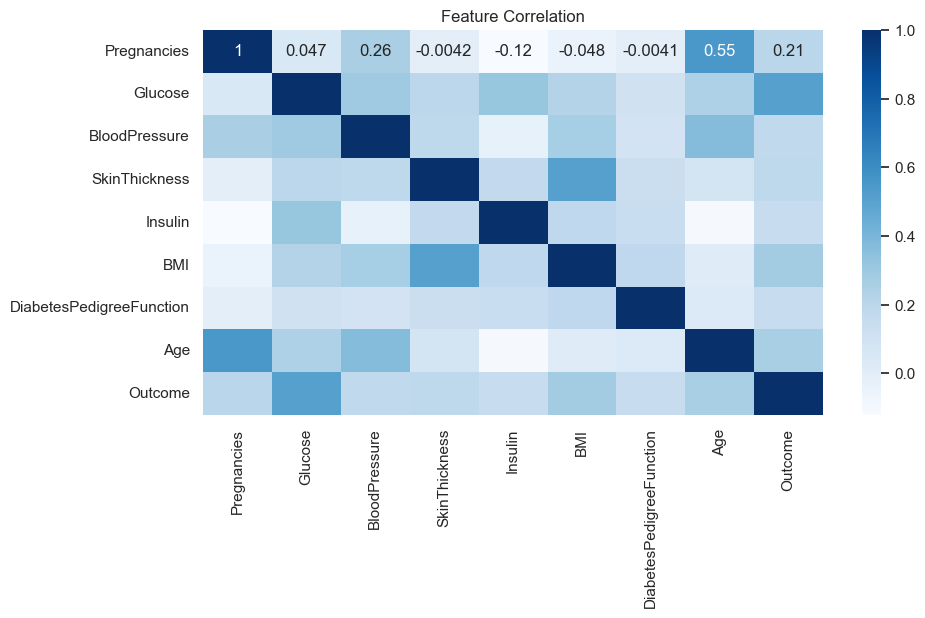

In [18]:
#Correlation plot
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation")

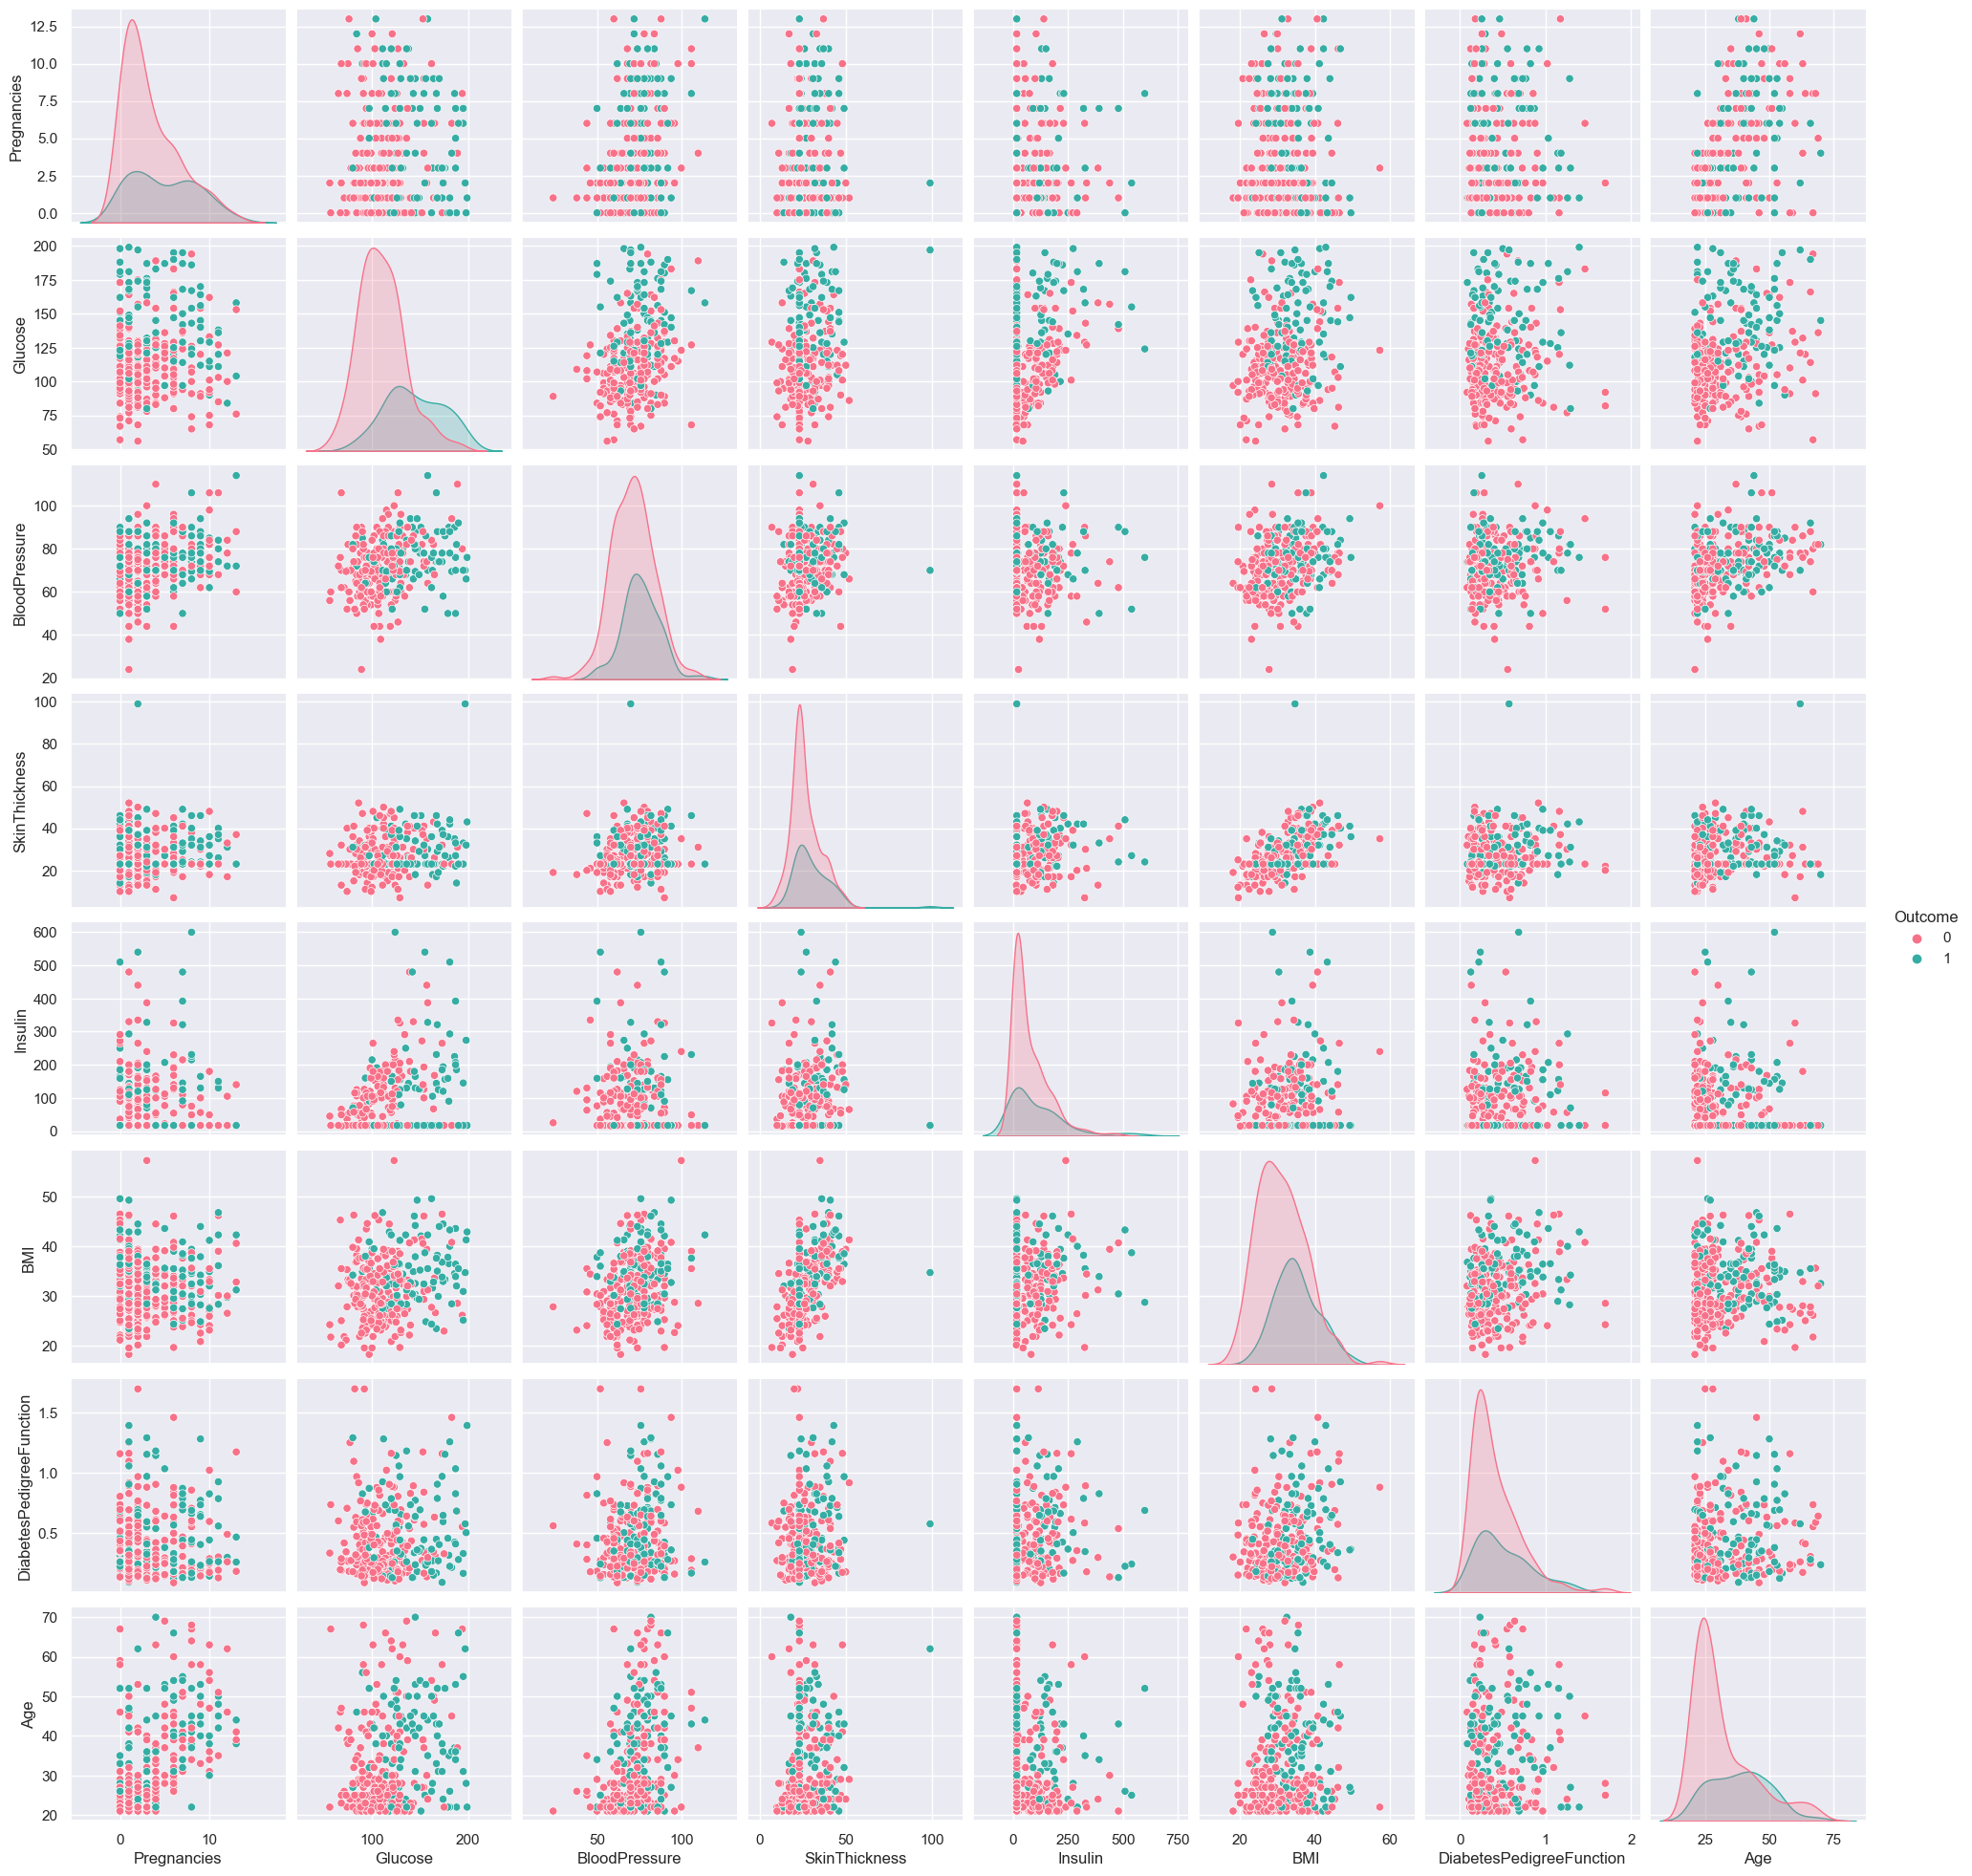

In [19]:
sns.pairplot(df, hue='Outcome', palette="husl")

<Axes: xlabel='Outcome'>

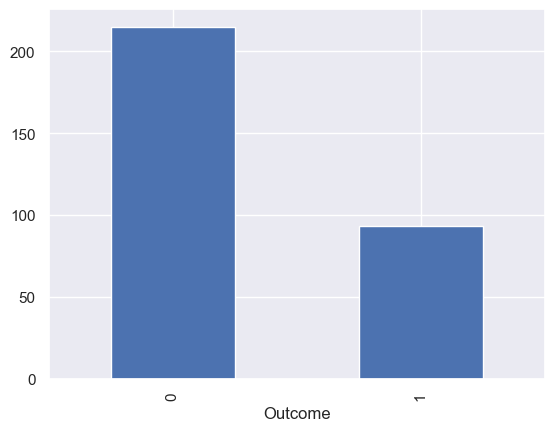

In [20]:
df.Outcome.value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Distribution of Outcome')

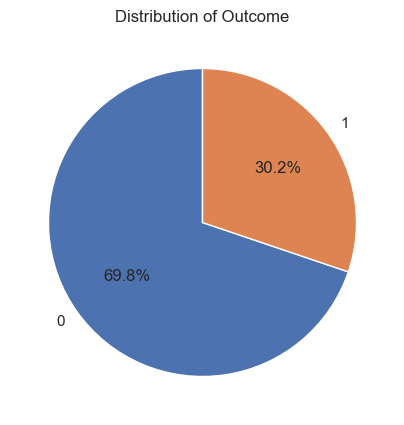

In [21]:
# count the number of samples for each species
outcome_counts = df['Outcome'].value_counts()

# create a pie chart
plt.figure(figsize=(5,5))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Outcome")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

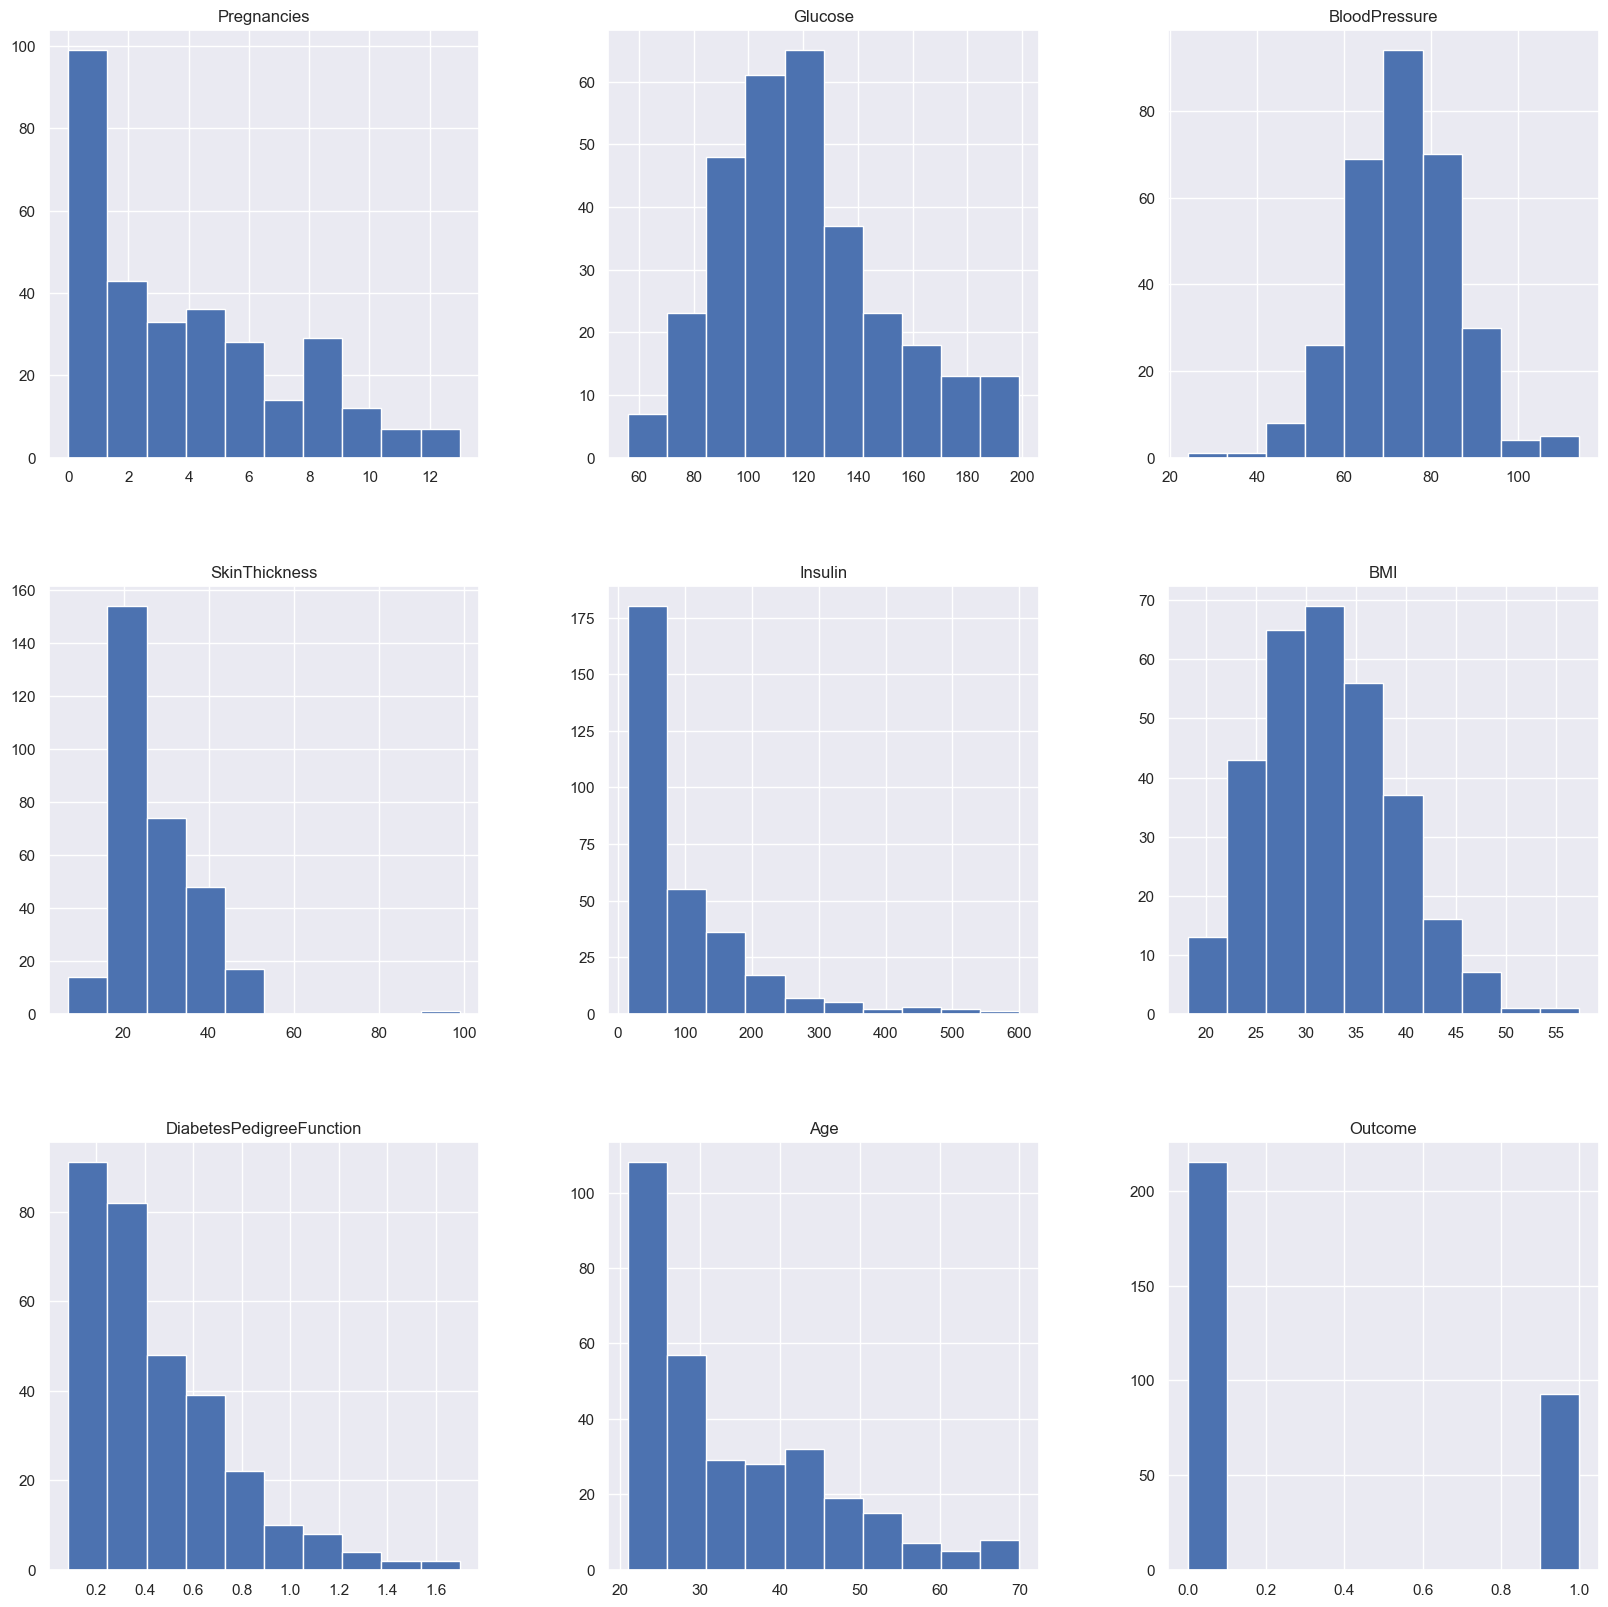

In [22]:
df.hist(figsize = (20,20))

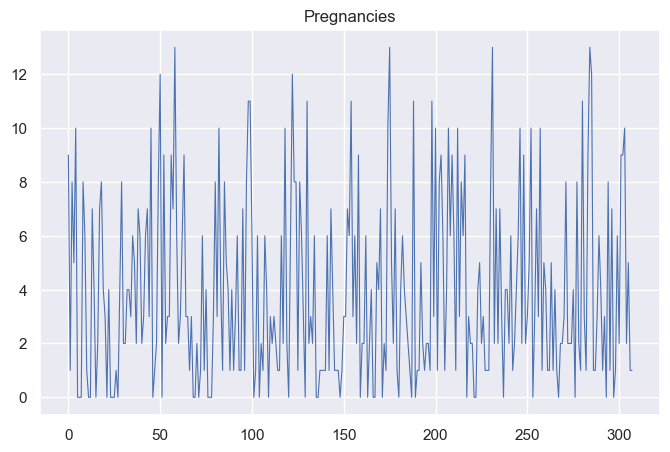

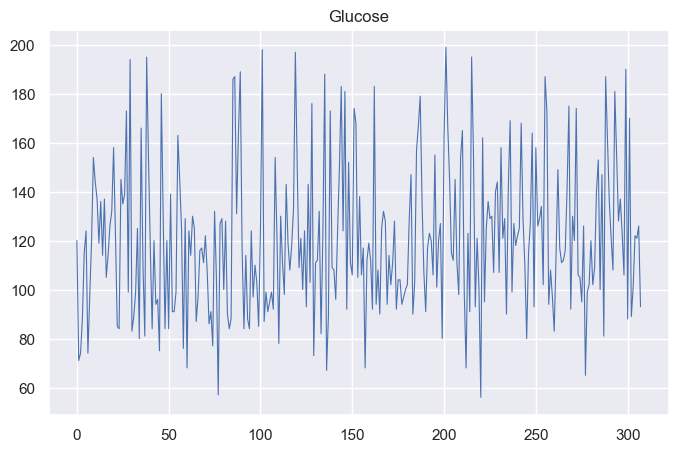

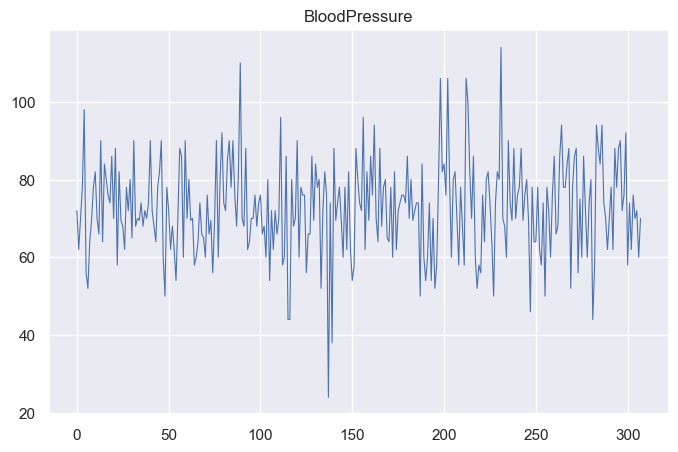

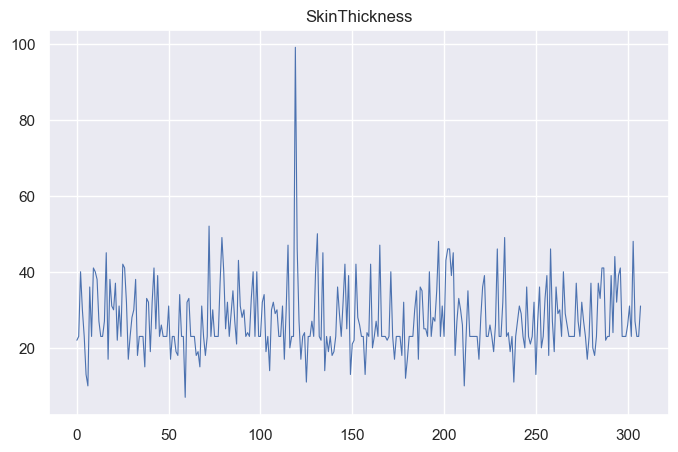

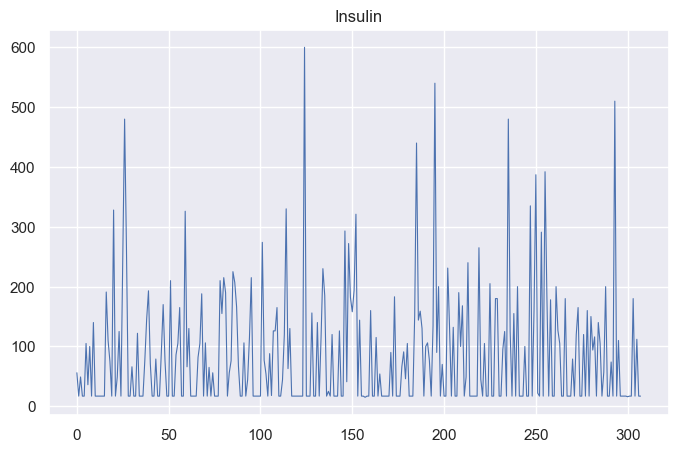

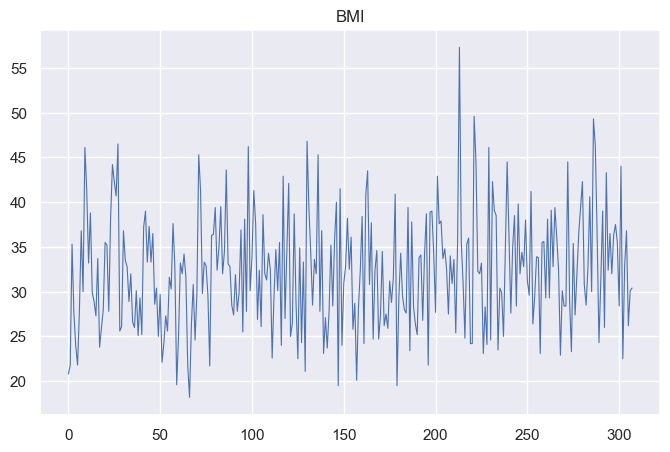

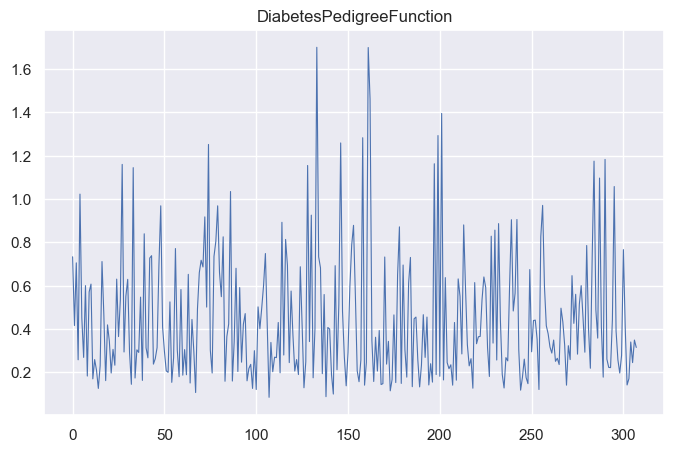

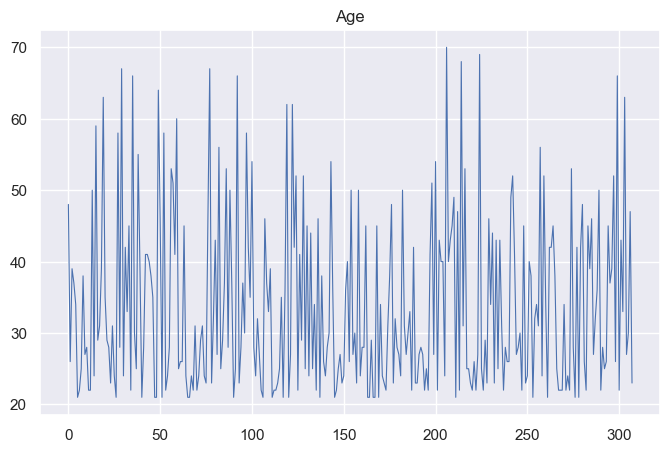

In [23]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.figure(figsize = (8,5))
    df[i].plot.line(title=i, linewidth = '0.8')
    plt.show()

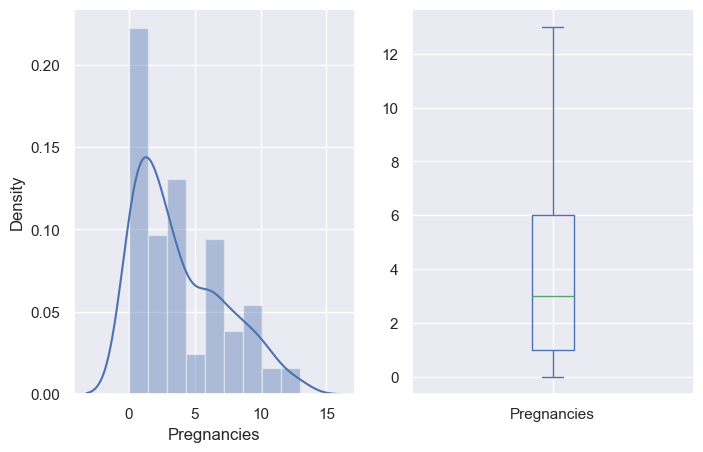

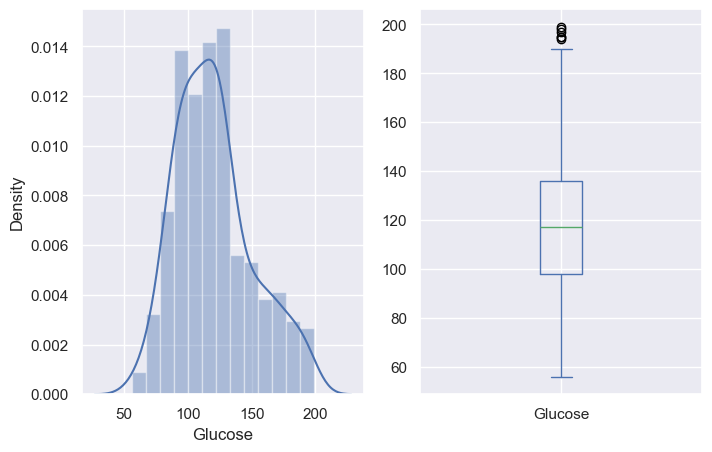

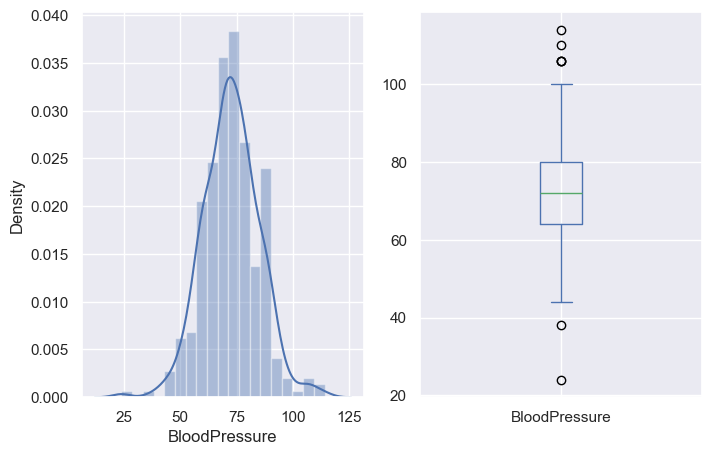

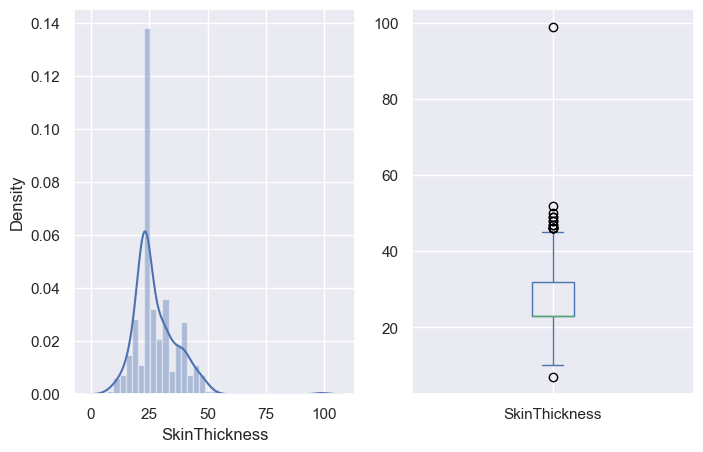

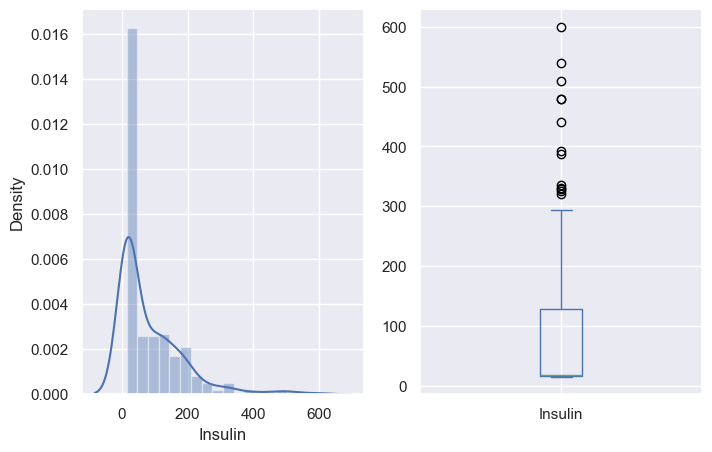

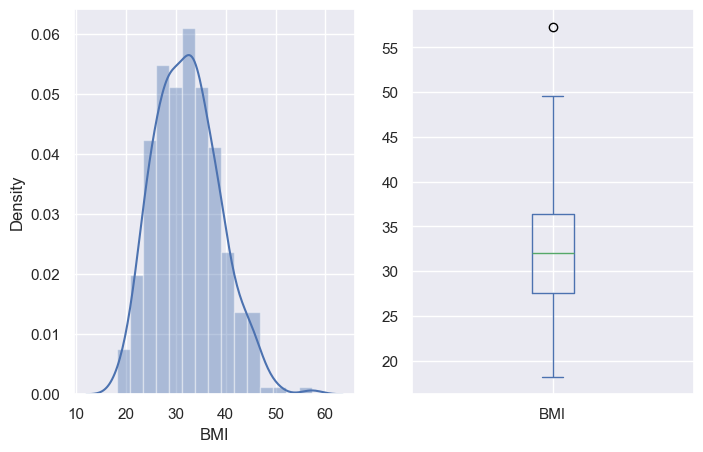

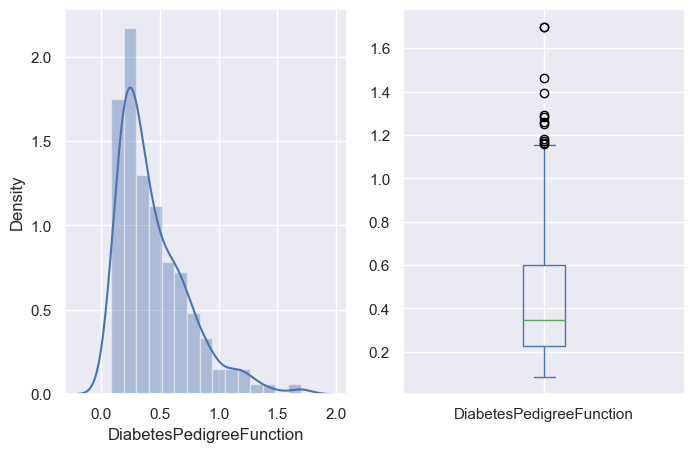

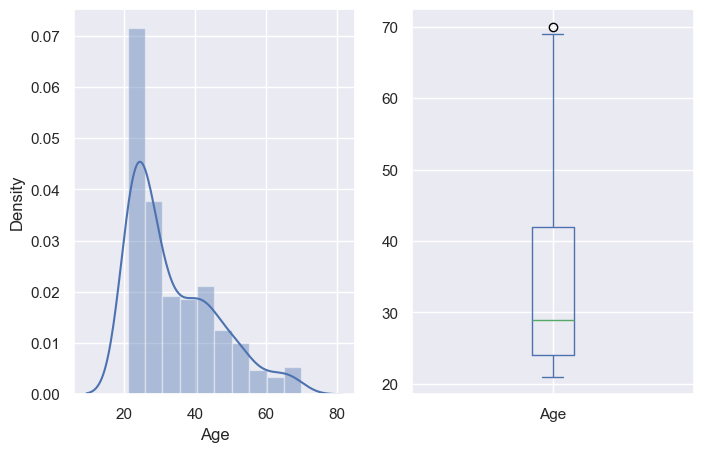

In [24]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    df[i].plot.box(figsize=(8,5))
    plt.show()

In [25]:
outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in outliers:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 
    df[i] = np.where (df[i] > max_limit, max_limit, (np.where(df[i] < min_limit, min_limit, df[i])))

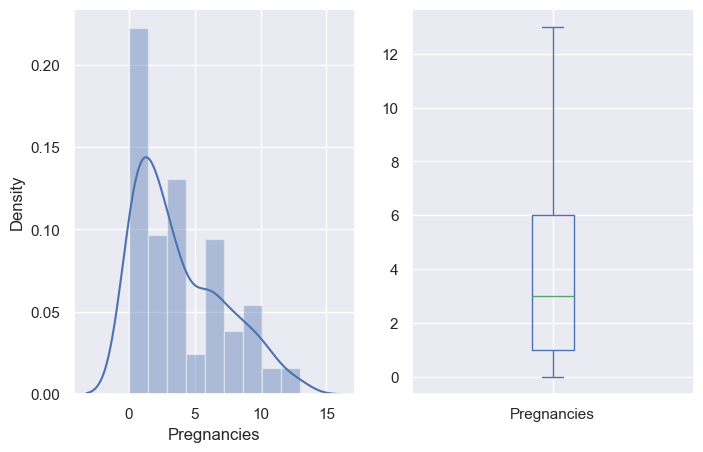

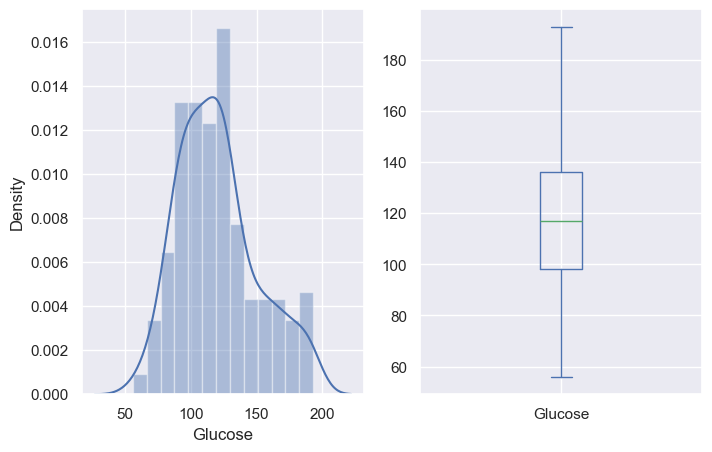

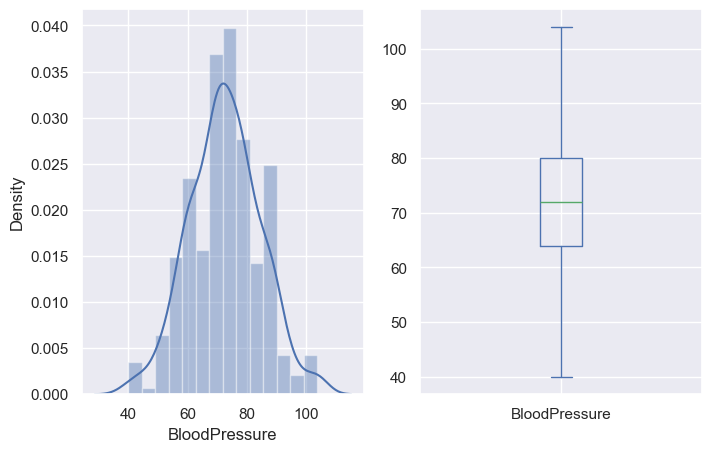

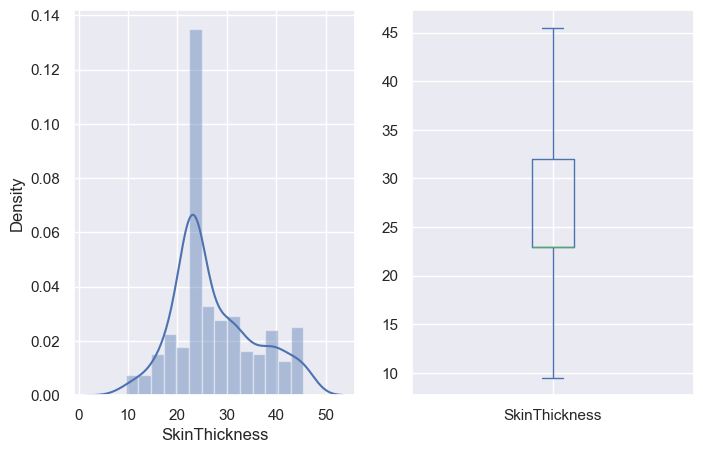

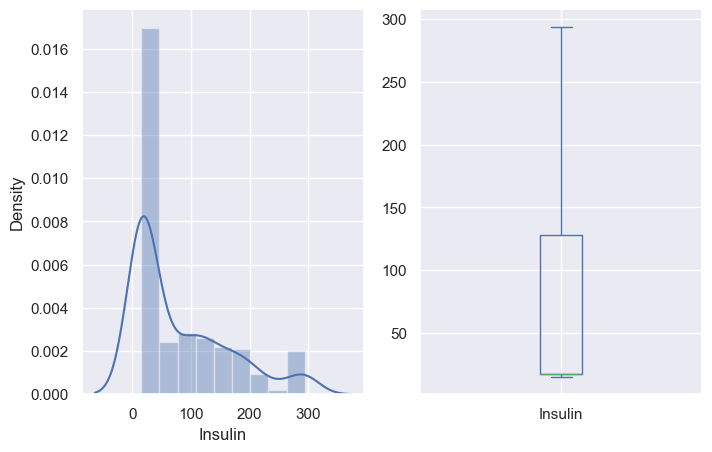

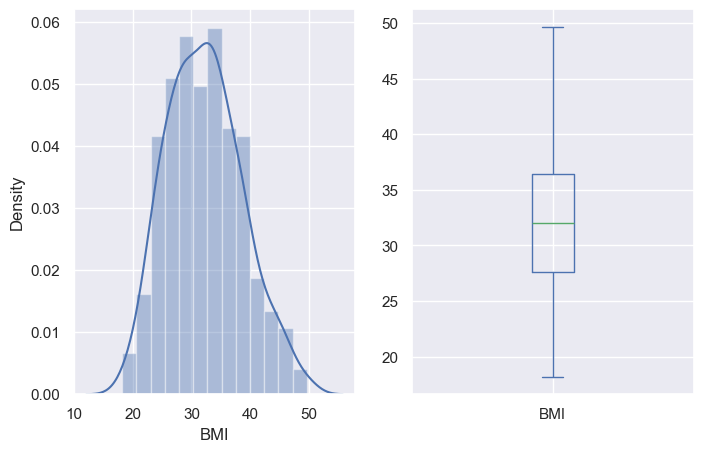

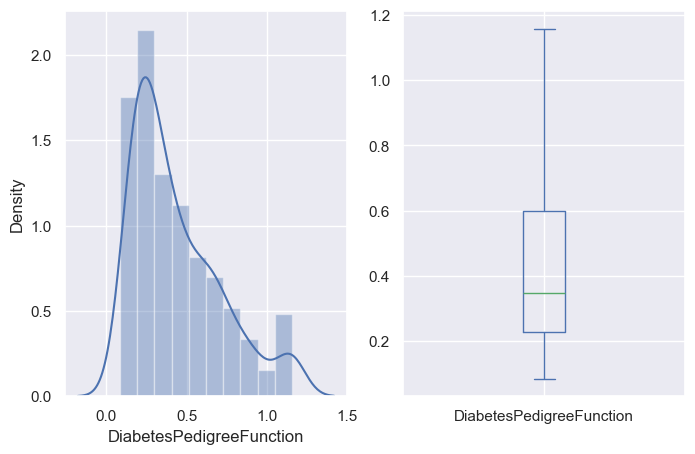

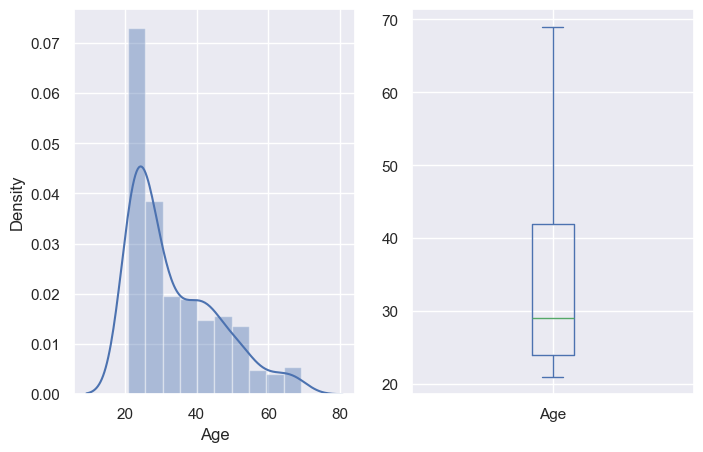

In [26]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    df[i].plot.box(figsize=(8,5))
    plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

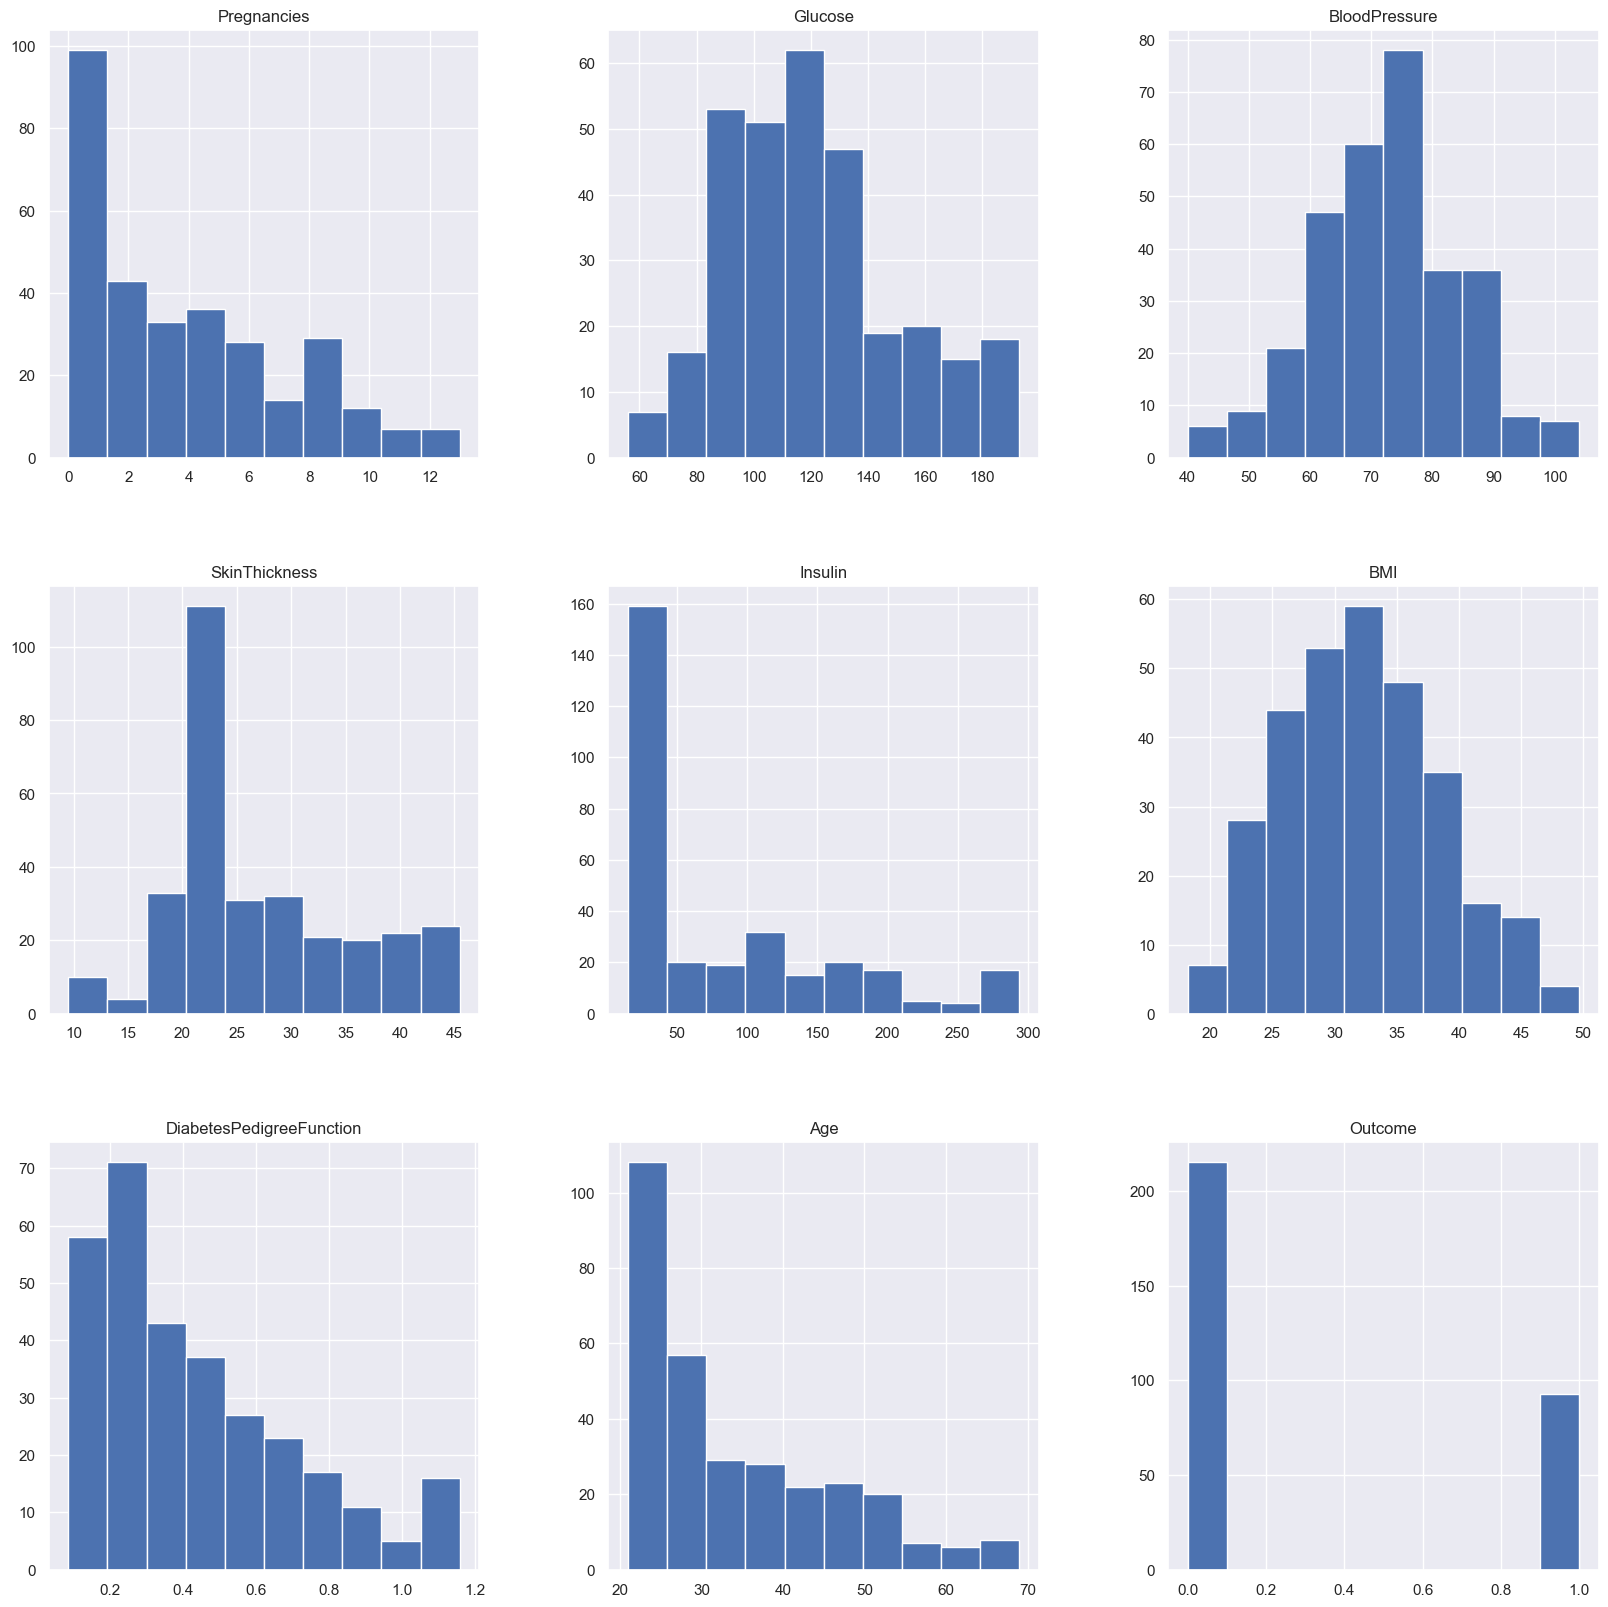

In [27]:
df.hist(figsize = (20,20))

Text(0.5, 1.0, 'Feature Correlation')

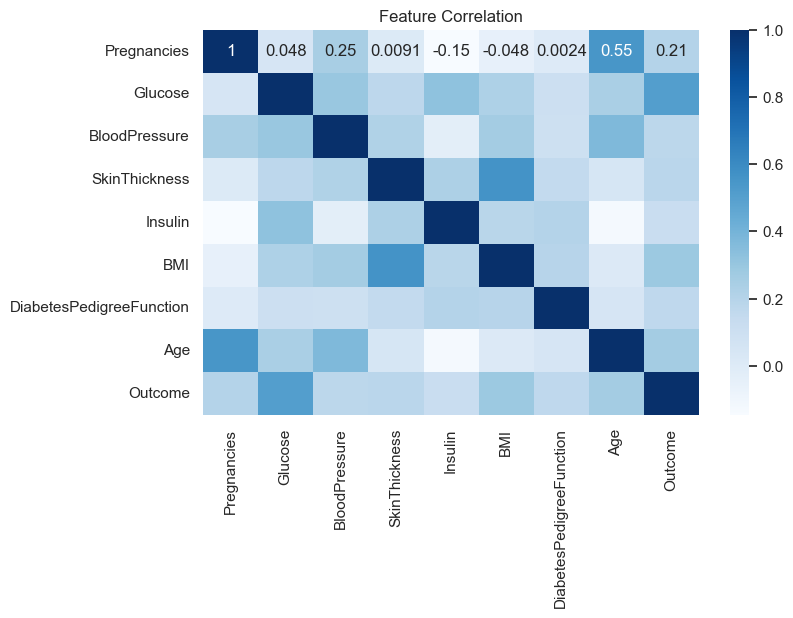

In [28]:
#Correlation plot
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation")

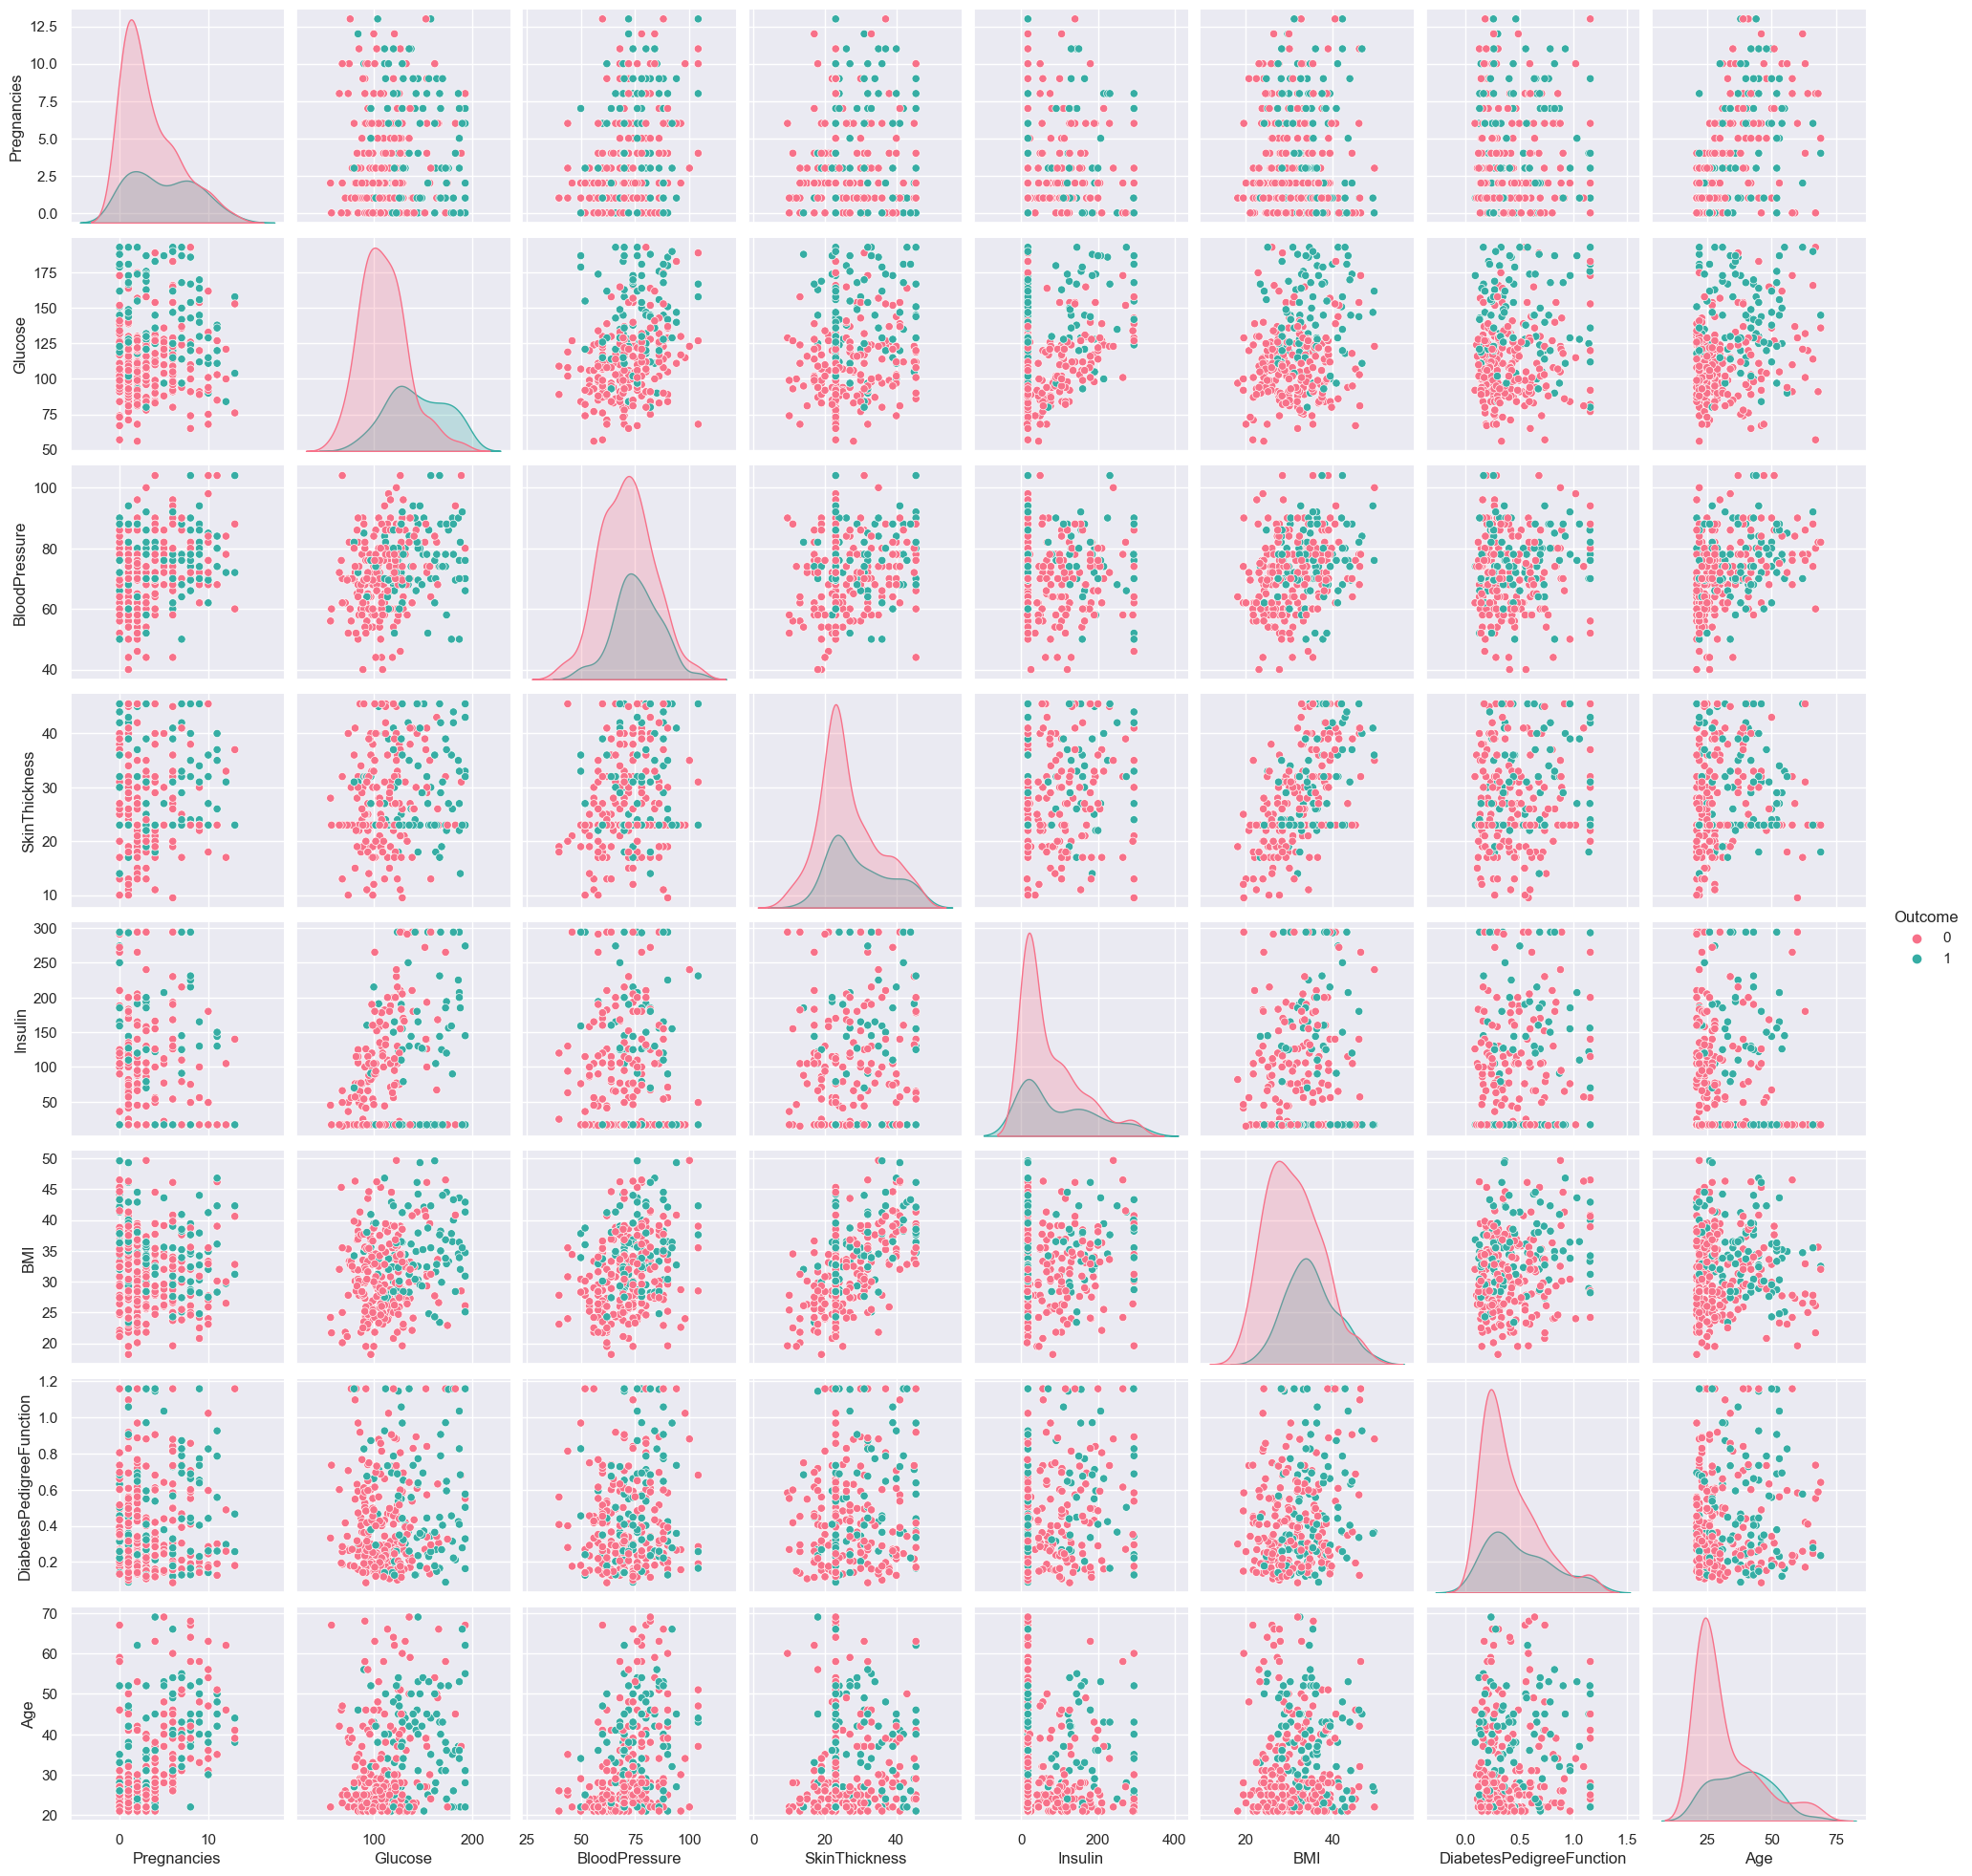

In [29]:
sns.pairplot(df, hue='Outcome', palette="husl")

In [30]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    120.0           72.0           22.0     56.0  20.8   
1          1.0     71.0           62.0           23.0     17.0  21.8   
2          8.0     74.0           70.0           40.0     49.0  35.3   
3          5.0     88.0           78.0           30.0     17.0  27.6   
4         10.0    115.0           98.0           23.0     17.0  24.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.733  48.0        0  
1                     0.416  26.0        0  
2                     0.705  39.0        0  
3                     0.258  37.0        0  
4                     1.022  34.0        0

In [31]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(df.drop(['Outcome'], axis=1), ), columns=['Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose', 'Insulin'])

X.head()

Pregnancies  BloodPressure  SkinThickness  DiabetesPedigreeFunction  \
0     1.521461      -0.010207      -0.054508                 -0.646444   
1    -0.848248      -1.632033      -0.893744                 -0.526320   
2     1.225247      -1.532737      -0.222355                  1.515779   
3     0.336606      -1.069359       0.449033                  0.314544   
4     1.817674      -0.175700       2.127504                 -0.526320   

        Age       BMI   Glucose   Insulin  
0 -0.300246 -1.798513  1.070197  1.171912  
1 -0.773152 -1.641530 -0.080425 -0.634475  
2 -0.385127  0.477749  0.968564  0.432936  
3 -0.773152 -0.731025 -0.653922  0.268719  
4 -0.773152 -1.296166  2.119186  0.022393

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

Y = df['Outcome']

# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 7)

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [33]:
# retrieve the shape of 'X_train' dataset 
X_train.shape

(246, 8)

In [34]:
# retrieve the shape of 'X_test' dataset 
X_test.shape

(62, 8)

In [35]:
# retrieve the shape of 'Y_train' series 
Y_train.shape

(246,)

In [36]:
# retrieve the shape of 'Y_test' series 
Y_test.shape 

(62,)

In [37]:
# initial model evaluation
from sklearn.metrics import accuracy_score

# model training
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

# check accuracy score 
train_acc = accuracy_score(Y_train, train_preds)
test_acc = accuracy_score(Y_test, test_preds)

# output the train accuracy and test accuracy
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.7967479674796748
Test accuracy:  0.8225806451612904


Train AUC:  0.8742928975487115
Test AUC:  0.8812729498164015


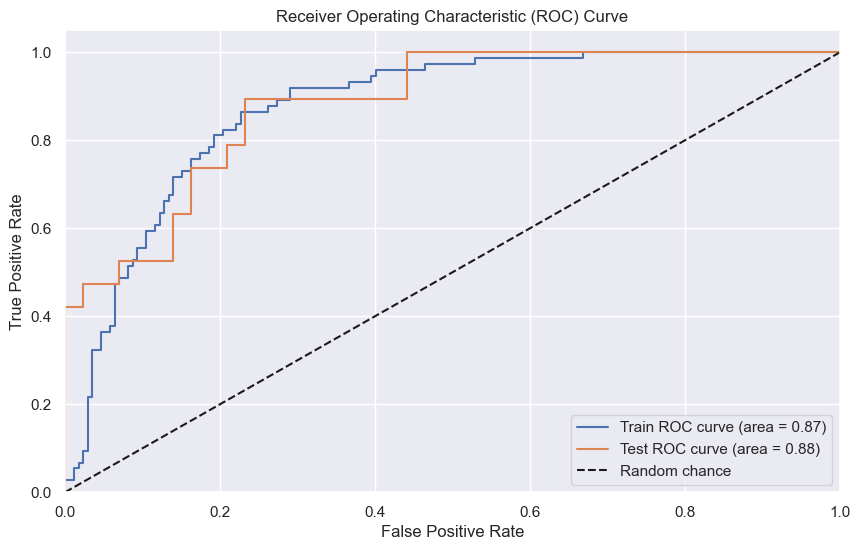

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities instead of labels
train_probs = log_reg.predict_proba(X_train)[:, 1]
test_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, train_probs)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, test_probs)

# Calculate AUC
train_auc = roc_auc_score(Y_train, train_probs)
test_auc = roc_auc_score(Y_test, test_probs)

print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[155  17]
 [ 33  41]]
[[42  1]
 [10  9]]


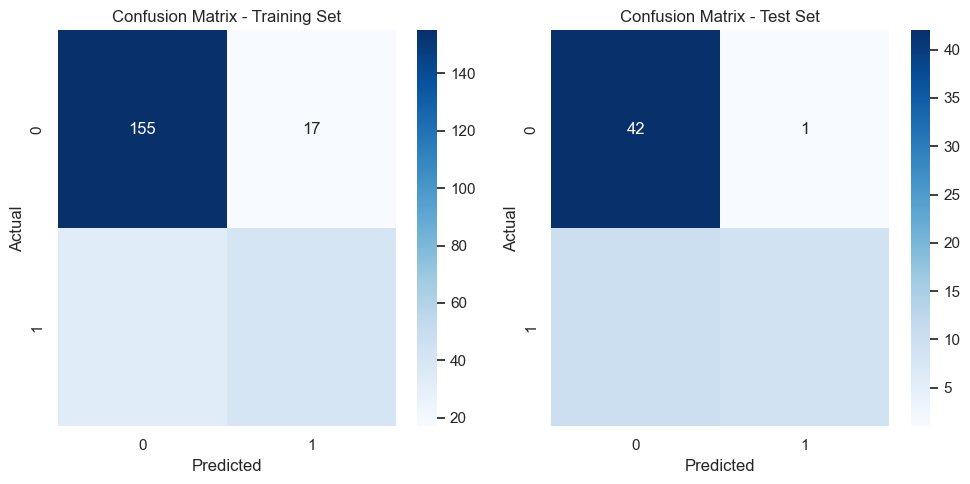

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

# Compute confusion matrix for training and test sets
train_cm = confusion_matrix(Y_train, train_preds)
test_cm = confusion_matrix(Y_test, test_preds)

print(train_cm)
print(test_cm)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import classification_report

# Compute classification report for the training set
train_report = classification_report(Y_train, train_preds)
print("Classification Report - Training Set")
print(train_report)

# Compute classification report for the test set
test_report = classification_report(Y_test, test_preds)
print("Classification Report - Test Set")
print(test_report)

Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       172
           1       0.71      0.55      0.62        74

    accuracy                           0.80       246
   macro avg       0.77      0.73      0.74       246
weighted avg       0.79      0.80      0.79       246

Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.81      0.98      0.88        43
           1       0.90      0.47      0.62        19

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



In [41]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_distributions = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
    'dual': [True, False],
    'fit_intercept': [True, False],
    'warm_start': [True, False]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(log_reg, param_distributions, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, Y_train)

# Retrieve and print the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)

# Access the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy = best_model.score(X_train, Y_train)
print("Train Accuracy with Best Parameters: ", train_accuracy)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, Y_test)
print("Test Accuracy with Best Parameters: ", test_accuracy)

Best Parameters:  {'warm_start': True, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 5000, 'fit_intercept': True, 'dual': False, 'C': 3792.690190732246}
Best Cross-Validation Score:  0.7845714285714285
Train Accuracy with Best Parameters:  0.7967479674796748
Test Accuracy with Best Parameters:  0.8225806451612904


In [43]:
from sklearn.metrics import classification_report

# Generate predictions for the training and test sets using the best model
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Compute classification report for the training set
train_report = classification_report(Y_train, train_preds)
print("Classification Report - Training Set")
print(train_report)

# Compute classification report for the test set
test_report = classification_report(Y_test, test_preds)
print("Classification Report - Test Set")
print(test_report)

Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       172
           1       0.71      0.55      0.62        74

    accuracy                           0.80       246
   macro avg       0.77      0.73      0.74       246
weighted avg       0.79      0.80      0.79       246

Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.81      0.98      0.88        43
           1       0.90      0.47      0.62        19

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62



Train AUC:  0.8739000628535513
Test AUC:  0.8788249694002448


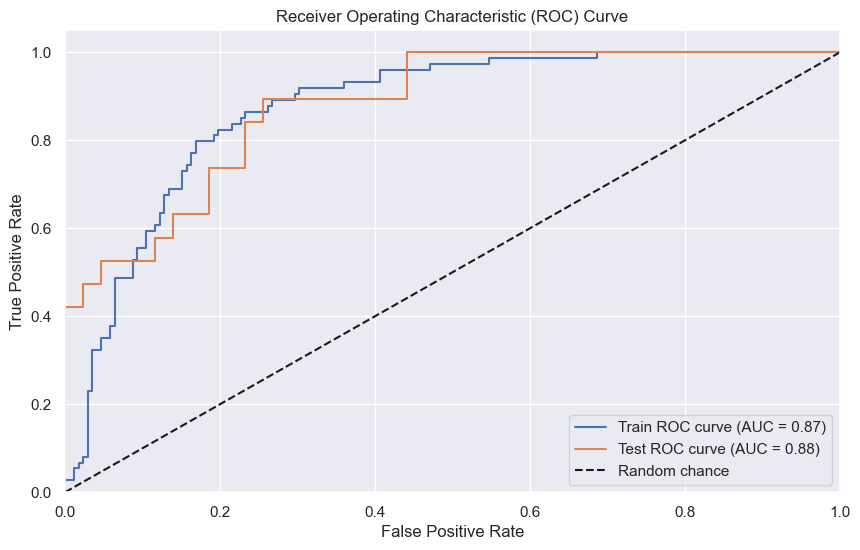

In [44]:
# Predict probabilities using the best model
train_probs = best_model.predict_proba(X_train)[:, 1]
test_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(Y_train, train_probs)
fpr_test, tpr_test, _ = roc_curve(Y_test, test_probs)

# Calculate AUC
train_auc = roc_auc_score(Y_train, train_probs)
test_auc = roc_auc_score(Y_test, test_probs)

print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[155  17]
 [ 33  41]]
[[42  1]
 [10  9]]


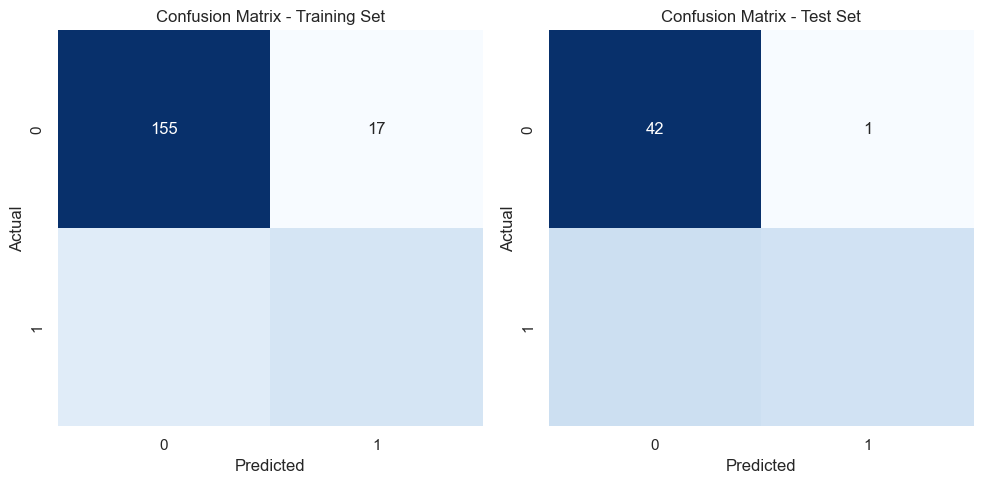

In [45]:
# Generate predictions using the best model
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Compute confusion matrix for training and test sets
train_cm = confusion_matrix(Y_train, train_preds)
test_cm = confusion_matrix(Y_test, test_preds)
print(train_cm)
print(test_cm)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [46]:
best_model.get_params()

{'C': 3792.690190732246,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': True}

<Axes: ylabel='Feature'>

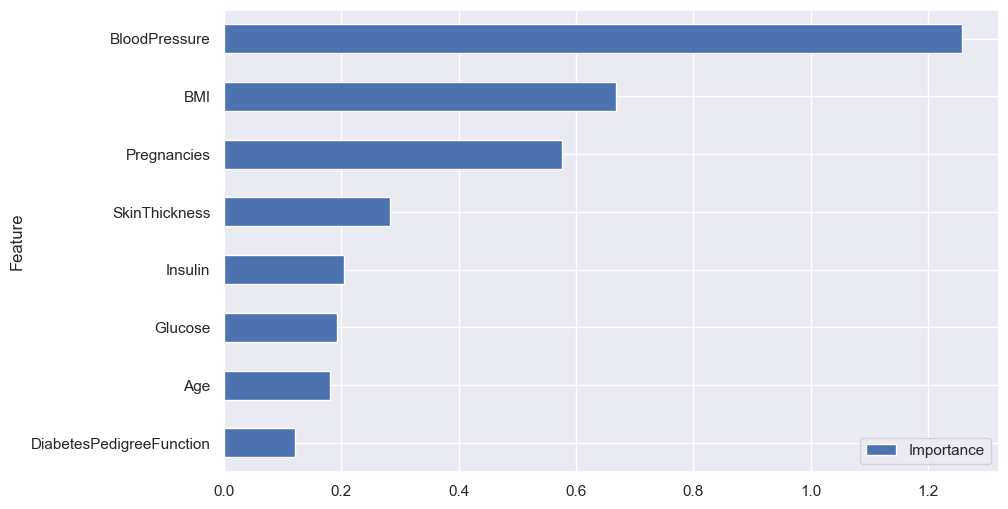

In [47]:
coefficients = best_model.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))